In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")
df.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [3]:
#Lets check with the shape
df.shape

(159571, 8)

In [4]:
#Lets check with null values
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [5]:
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [6]:
df['loathe'].sum()

1405

In [7]:
#we will drop the unnecessary column in order to clean the dataset
df.drop(['id'],axis=1,inplace=True)


In [8]:
#lets check again 
df.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0


In [9]:
df['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [11]:
stop_words = stopwords.words('english')

In [12]:
lemmatizer = WordNetLemmatizer()

In [13]:
for index, row in df.iterrows():
    filter_sentence = ' '
    sentence = row['comment_text']
    
    # Tokenization
    words = nltk.word_tokenize(sentence)
    # Stopwords removal
    words = [w for w in words if not w in stop_words]
    # Lemmatization
    for words in words:
        filter_sentence = filter_sentence  + ' ' + str(lemmatizer.lemmatize(words)).lower()
    df.loc[index, 'comment_text'] = filter_sentence
df = df[['comment_text', 'loathe']]

In [14]:
df.head(10)

,comment_text,loathe
0,explanation why edits made username hardcore...,0
1,d'aww ! he match background colour i 'm seem...,0
2,"hey man , i 'm really trying edit war . it '...",0
3,`` more i ca n't make real suggestion improv...,0
4,"you , sir , hero . any chance remember page ...",0
5,"`` congratulations well , use tool well . · ...",0
6,cocksucker before you piss around on my work,0
7,your vandalism matt shirvington article reve...,0
8,"sorry word 'nonsense ' offensive . anyway , ...",0
9,alignment subject contrary dulithgow,0


In [15]:
X_train = df['comment_text']
Y_train = df['loathe']

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix,Y_train, random_state=0)

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Accuracy = logreg.score(X_test, y_test)
print(Accuracy)

0.9915524026771614


In [21]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train, y_train)
Accuracy = NB.score(X_test, y_test)
print(Accuracy)

0.9908505251547891


In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
Accuracy = clf.score(X_test, y_test)
print(Accuracy)

0.9895721053818965


In [23]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train,y_train)
accuracy = classifier.score(X_test, y_test)
print(accuracy)

0.9918030732208658


In [26]:
#lets create an objects for the models
KNN = KNeighborsClassifier(n_neighbors=6)
SV = SVC()
LR = LogisticRegression()
DT = DecisionTreeClassifier(random_state=6)
GNB = GaussianNB()

In [27]:
models = []
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [28]:

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,auc,roc_curve

In [29]:
from sklearn.model_selection import cross_val_score


*************************** KNeighborsClassifier *******************************


KNeighborsClassifier(n_neighbors=6)


Accuracy Score 0.991301732133457


cross_val_score =  0.9914604211548335


roc_auc_curve 0.524880155996909


classification_report               precision    recall  f1-score   support

           0       0.99      1.00      1.00     39532
           1       0.82      0.05      0.09       361

    accuracy                           0.99     39893
   macro avg       0.90      0.52      0.54     39893
weighted avg       0.99      0.99      0.99     39893



[[39528     4]
 [  343    18]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*************************** SVC *******************************


SVC()


Accuracy Score 0.9918030732208658


cross_val_score =  0.9919701241415229


roc_auc_curve 0.5717944969999409


classification_report               precision    recall  f1-score   support

           0       0.99      1.00      1.00     39532
           1       0.74 

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

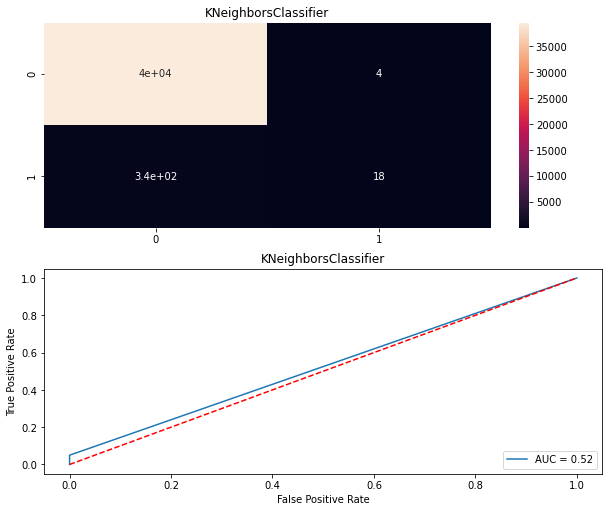

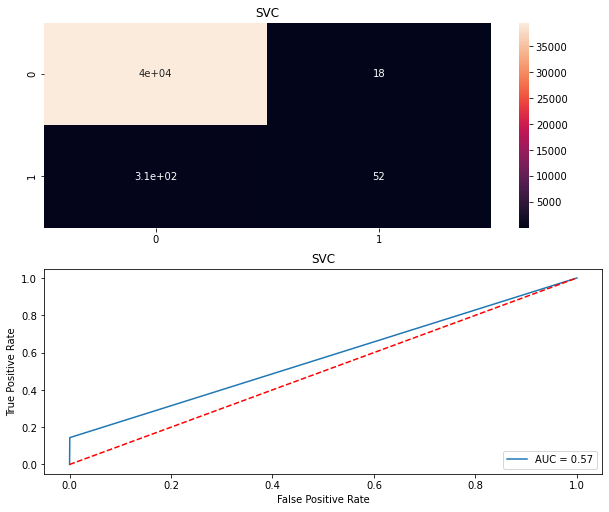

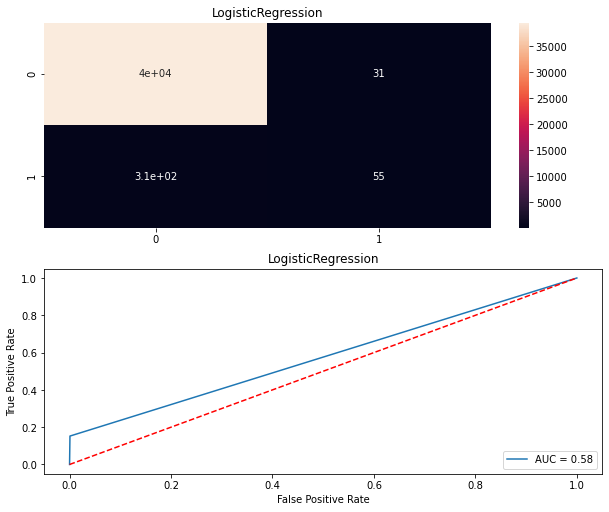

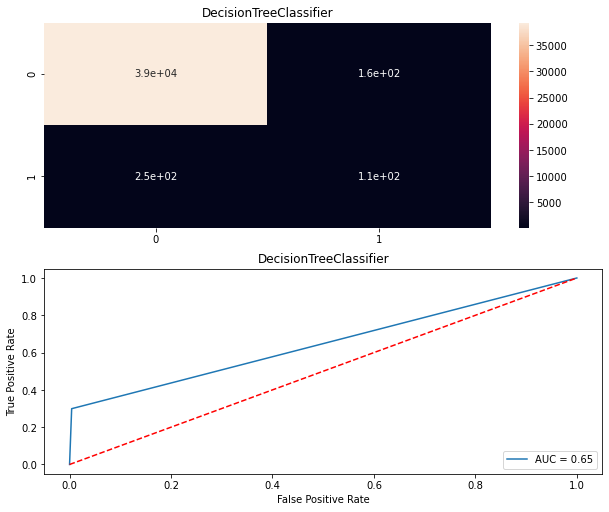

In [32]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('***************************',name,'*******************************')
    print('\n')
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print('Accuracy Score',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy').mean()
    print('cross_val_score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    print('roc_auc_curve',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report',classification_report(y_test,pre))
    print('\n')
    cm = confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label = 'AUC = %0.2f' %roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print('\n\n')

ACCURACY :-

1)KNeighborsClassifier(n_neighbors=6)
Accuracy Score 0.991301732133457
cross_val_score =  0.9914604211548335
roc_auc_curve 0.524880155996909
2)SVC():-
Accuracy Score 0.9918030732208658
cross_val_score =  0.9919701241415229
roc_auc_curve 0.5717944969999409
3)LogisticRegression()
Accuracy Score 0.9915524026771614
cross_val_score =  0.9918614976557636
roc_auc_curve 0.5757851978957124
4)DecisionTreeClassifier(random_state=6)
Accuracy Score 0.9895470383275261
cross_val_score =  0.9902655402848028
roc_auc_curve 0.64751021858795


# here we can use SVC model which gives higher accuracy such as 99.18%